#### importing the necessary package

In [17]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Loading the data using Pandas
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Understanding the data 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [20]:
# The .shape code gives the no. of rows and columns
df.shape

(9240, 37)

#### EDA 

In [21]:
# Converting all the values to lower case
df = df.applymap(lambda l:l.lower() if type(l) == str else l)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,select,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,select,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


In [22]:
#dropping Lead Number and Prospect ID since they have all unique values
df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [23]:
#Replacing 'Select' values with Nan
df=df.replace("Select", np.nan)

In [24]:
#Checking for count of missing values in each column
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [25]:
#checking percentage of null values in each column
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [26]:
df1 = df.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Tags','Lead Quality'],axis=1)
df1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,...,no,no,no,no,no,select,select,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,no,no,no,no,no,select,select,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,no,no,no,no,no,potential lead,mumbai,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,no,no,no,no,no,select,mumbai,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,no,no,no,no,no,select,mumbai,no,no,modified


In [27]:
df1['Specialization'] = df1['Specialization'].fillna('not provided') 
df1['What matters most to you in choosing a course'] = df1['What matters most to you in choosing a course'].fillna('not provided')
df1['Country'] = df1['Country'].fillna('not provided')
df1['What is your current occupation'] = df1['What is your current occupation'].fillna('not provided')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [28]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df1['Country'] = df1.apply(lambda x:slots(x['Country']), axis = 1)
df1['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [29]:
# Rechecking the percentage of missing values
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

##### again removing the column with high percentage of column lead profile, city, How did you hear about X Education 

In [30]:
df1 = df1.drop(['Lead Profile','City','How did you hear about X Education'],axis=1)
df1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not provided,...,no,no,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,no,no,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,no,no,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,no,no,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,no,no,no,no,no,no,no,no,no,modified


In [31]:
# Rechecking the percentage of missing values
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

#### Categorical Attributes Analysis:

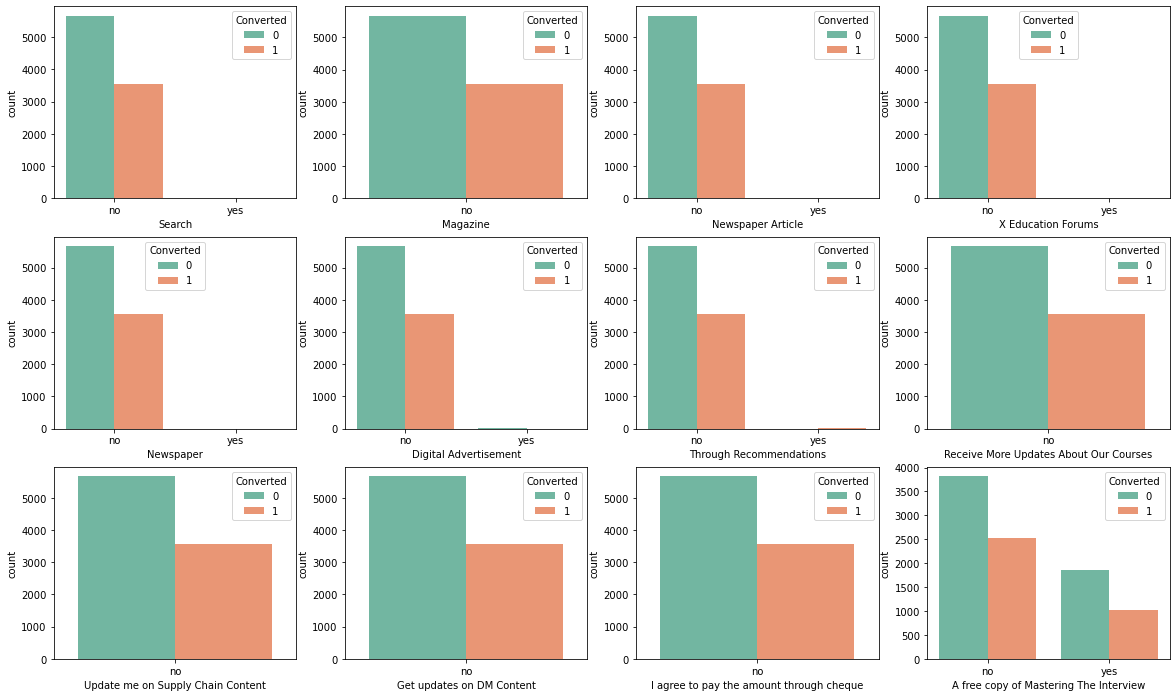

In [32]:
# Visualzing  variables for imbalancing
fig, axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot(x = "X Education Forums", hue = "Converted", data = df1, ax = axs[0,3],palette = 'Set2')
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = df1, ax = axs[2,1],palette = 'Set2')
sns.countplot(x = "Search", hue = "Converted", data = df1, ax = axs[0,0],palette = 'Set2')
sns.countplot(x = "Magazine", hue = "Converted", data = df1, ax = axs[0,1],palette = 'Set2')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df1, ax = axs[0,2],palette = 'Set2')
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = df1, ax = axs[2,2],palette = 'Set2')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df1, ax = axs[2,3],palette = 'Set2')
sns.countplot(x = "Newspaper", hue = "Converted", data = df1, ax = axs[1,0],palette = 'Set2')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df1, ax = axs[1,1],palette = 'Set2')
sns.countplot(x = "Through Recommendations", hue = "Converted", data = df1, ax = axs[1,2],palette = 'Set2')
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = df1, ax = axs[1,3],palette = 'Set2')
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =df1, ax = axs[2,0],palette = 'Set2')

plt.show()

there is not huge imbalance in any data

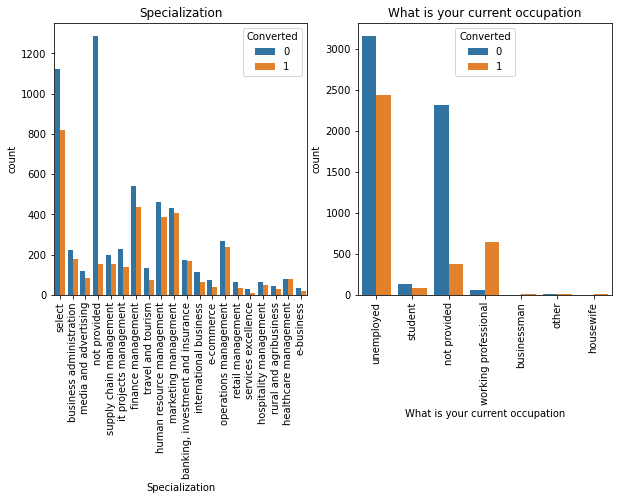

In [33]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

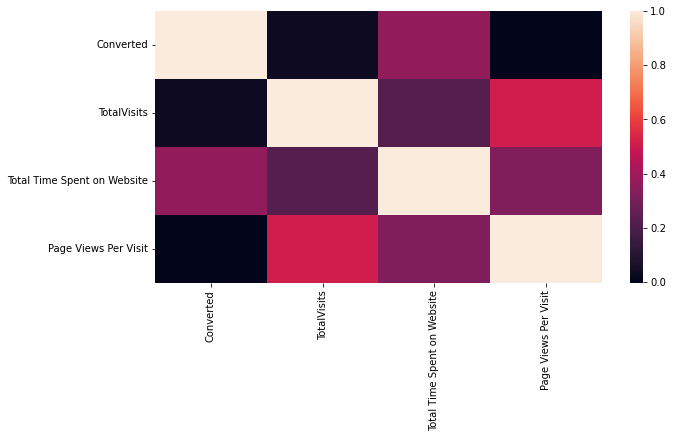

In [34]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr())
plt.show()

It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.

In [35]:
numeric = df1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


#### Dummy Variables 

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [37]:
df1.loc[:, df1.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [38]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df1[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df1_final = pd.concat([df1, dummy], axis=1)
df1_final

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


#### Replacing the null values

In [39]:
df1_final['TotalVisits'] = df1_final['TotalVisits'].replace(np.nan,0)
df1_final['Total Time Spent on Website'] = df1_final['Total Time Spent on Website'].replace(np.nan,0)
df1_final['Page Views Per Visit'] = df1_final['Page Views Per Visit'].replace(np.nan,0)

In [40]:
df1_final = df1_final.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df1_final

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Magazine,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,Lead Origin_landing page submission,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,no,no,no,no,no,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,no,no,no,no,no,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,no,no,no,no,no,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,no,no,no,no,no,1,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,no,no,no,no,no,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,no,no,no,no,no,1,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,no,no,no,no,no,1,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,no,no,no,no,no,1,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,no,no,no,no,no,1,...,0,0,0,0,0,0,1,0,0,0


In [41]:
df1_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Magazine,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,Lead Origin_landing page submission,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.0,no,no,no,no,no,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,no,no,no,no,no,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,no,no,no,no,no,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,no,no,no,no,no,1,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,no,no,no,no,no,1,...,0,0,1,0,0,0,0,0,0,0


#### Replacing the var columns 

In [42]:
 df1_final=df1_final.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],1)

In [43]:
df1_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 95 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Converted                                                                9240 non-null   int64  
 1   TotalVisits                                                              9240 non-null   float64
 2   Total Time Spent on Website                                              9240 non-null   int64  
 3   Page Views Per Visit                                                     9240 non-null   float64
 4   Lead Origin_landing page submission                                      9240 non-null   uint8  
 5   Lead Origin_lead add form                                                9240 non-null   uint8  
 6   Lead Origin_lead import                                                 

#### Testing and Training the variable 

In [44]:
# Import the required library
from sklearn.model_selection import train_test_split

In [45]:
X = df1_final.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [46]:
# Putting the target variable in y
y = df1_final['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [47]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [48]:
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1871,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.015936,0.214349,0.024182,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3516,0.019920,0.046655,0.045455,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.019920,0.541373,0.090909,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 94 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   TotalVisits                                                              6468 non-null   float64
 1   Total Time Spent on Website                                              6468 non-null   float64
 2   Page Views Per Visit                                                     6468 non-null   float64
 3   Lead Origin_landing page submission                                      6468 non-null   uint8  
 4   Lead Origin_lead add form                                                6468 non-null   uint8  
 5   Lead Origin_lead import                                                  6468 non-null   uint8  
 6   Lead Origin_quick add form                                           

In [50]:
X_train

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1871,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.015936,0.214349,0.024182,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3516,0.019920,0.046655,0.045455,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.019920,0.541373,0.090909,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,0.000000,0.310299,0.000000,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8039,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6936,0.007968,0.104754,0.036364,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Feature Scaling 

In [51]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler

In [52]:
## Checking the conversion rate from 'converted' column as it denotes the target variable
(sum(y)/len(y.index))*100

38.53896103896104

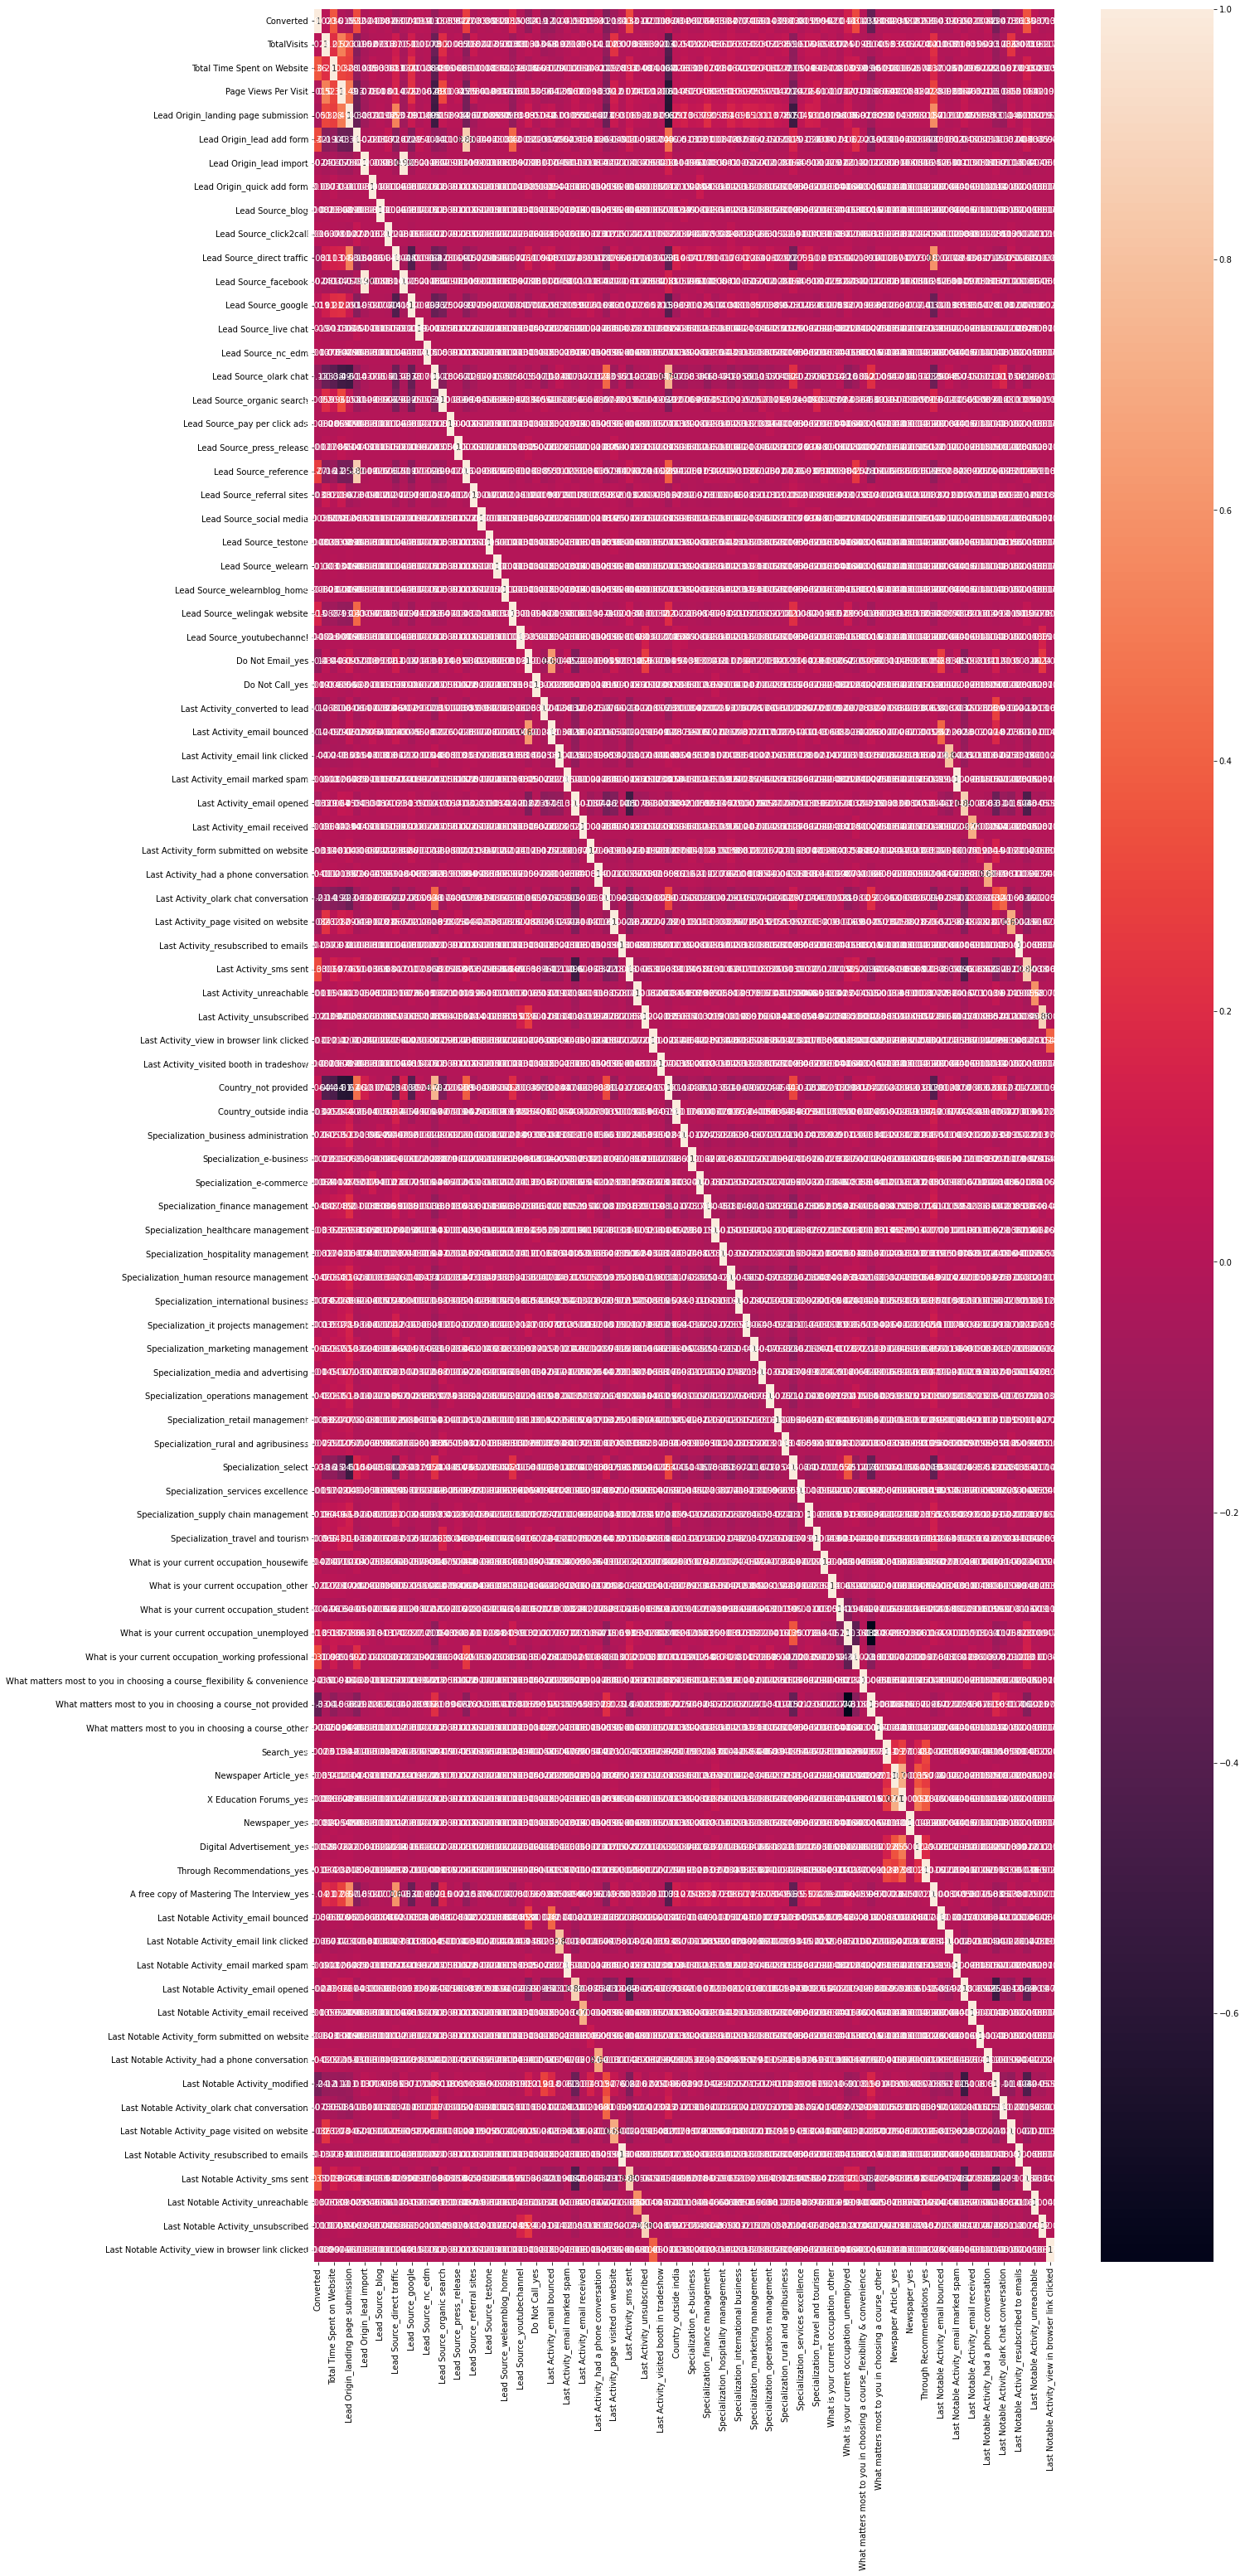

In [53]:
# Let's see the correlation matrix
plt.figure(figsize = (20,50))        # Size of the figure
sns.heatmap(df1_final.corr(),annot = True)
plt.show()

Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE

#### Model Building 

In [54]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
logreg = LogisticRegression()

In [55]:
# Import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [56]:
rfe.support_

array([ True,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False,  True, False, False])

In [57]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('Lead Origin_landing page submission', False, 10),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 17),
 ('Lead Origin_quick add form', False, 63),
 ('Lead Source_blog', False, 57),
 ('Lead Source_click2call', False, 23),
 ('Lead Source_direct traffic', False, 32),
 ('Lead Source_facebook', False, 2),
 ('Lead Source_google', False, 48),
 ('Lead Source_live chat', False, 55),
 ('Lead Source_nc_edm', False, 9),
 ('Lead Source_olark chat', False, 71),
 ('Lead Source_organic search', False, 46),
 ('Lead Source_pay per click ads', False, 54),
 ('Lead Source_press_release', False, 58),
 ('Lead Source_reference', False, 53),
 ('Lead Source_referral sites', False, 47),
 ('Lead Source_social media', False, 16),
 ('Lead Source_testone', False, 79),
 ('Lead Source_welearn', False, 51),
 ('Lead Source_welearnblog_home', False, 62),
 ('Lead Source_welingak websi

In [58]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_lead add form', 'Lead Source_welingak website',
       'Do Not Email_yes', 'Last Activity_had a phone conversation',
       'Last Activity_sms sent', 'Country_not provided',
       'What is your current occupation_housewife',
       'What is your current occupation_working professional',
       'What matters most to you in choosing a course_not provided',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_unreachable'],
      dtype='object')

In [59]:
# selecting all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [60]:
# selecting all columns selected by RFE
X_train = X_train[col]

#### Building the Model 1 

In [61]:
# Importing statsmodels
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2620.8
Date:                Sat, 18 Feb 2023   Deviance:                       5241.6
Time:                        12:44:02   Pearson chi2:                 6.86e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4049
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.0672      0.086    -23.900      0.000      -2.237      -1.898
TotalVisits                                                    5.9496      1.944      3.061      0.002       2.140       9.760
Total Time Spent on Website                                    4.5689      0.168     27.175      0.000       4.239       4.898
Lead Origin_lead add form                                      2.3860      0.197     12.124      0.000       2.000       2.772
Lead Source_welingak website                                   1.9006      0.742      2.561      0.010       0.446       3.355
Do Not Email_yes                                              -1.2662      0.170     -7.468      0.000      -1.599      -0.934
Last Activity_had a phone conversation                         1.2011      0.966      1.243      0.214      -0.692       3.095
Last Activity_sms sent                                         1.2396      0.075     16.621      0.000       1.093       1.386
Country_not provided                                           1.2625      0.108     11.640      0.000       1.050       1.475
What is your current occupation_housewife                     23.0024   1.38e+04      0.002      0.999    -2.7e+04    2.71e+04
What is your current occupation_working professional           2.5488      0.189     13.498      0.000       2.179       2.919
What matters most to you in choosing a course_not provided    -1.0815      0.087    -12.449      0.000      -1.252      -0.911
Last Notable Activity_had a phone conversation                 2.1698      1.476      1.471      0.141      -0.722       5.062
Last Notable Activity_modified                                -0.9032      0.080    -11.329      0.000      -1.059      -0.747
Last Notable Activity_olark chat conversation                 -0.9916      0.325     -3.054      0.002      -1.628      -0.355
Last Notable Activity_unreachable                              1.8088      0.535      3.379      0.001       0.760       2.858
==============================================================================================================================
"""

#### we can see p-value of variable current occupation_Housewife is high, so we can drop it. 

In [62]:
col = col.drop('What is your current occupation_housewife')

#### Model 2 

In [63]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2628.6
Date:                Sat, 18 Feb 2023   Deviance:                       5257.2
Time:                        12:44:09   Pearson chi2:                 6.88e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.0527      0.086    -23.830      0.000      -2.222      -1.884
TotalVisits                                                    5.8341      1.936      3.014      0.003       2.040       9.628
Total Time Spent on Website                                    4.5590      0.168     27.175      0.000       4.230       4.888
Lead Origin_lead add form                                      2.4210      0.197     12.320      0.000       2.036       2.806
Lead Source_welingak website                                   1.8676      0.742      2.516      0.012       0.413       3.322
Do Not Email_yes                                              -1.2722      0.170     -7.504      0.000      -1.605      -0.940
Last Activity_had a phone conversation                         1.1862      0.967      1.227      0.220      -0.709       3.081
Last Activity_sms sent                                         1.2312      0.074     16.527      0.000       1.085       1.377
Country_not provided                                           1.2474      0.108     11.540      0.000       1.036       1.459
What is your current occupation_working professional           2.5395      0.189     13.455      0.000       2.170       2.909
What matters most to you in choosing a course_not provided    -1.0861      0.087    -12.515      0.000      -1.256      -0.916
Last Notable Activity_had a phone conversation                 2.1758      1.476      1.474      0.140      -0.717       5.069
Last Notable Activity_modified                                -0.8974      0.080    -11.284      0.000      -1.053      -0.741
Last Notable Activity_olark chat conversation                 -0.9919      0.325     -3.055      0.002      -1.628      -0.355
Last Notable Activity_unreachable                              1.8016      0.535      3.365      0.001       0.752       2.851
==============================================================================================================================
"""

#### we can see p-value of variable Last Activity_had a phone conversation	, so we can drop it.

In [64]:
col = col.drop('Last Activity_had a phone conversation')

#### Model 3

In [65]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.4
Date:                Sat, 18 Feb 2023   Deviance:                       5258.8
Time:                        12:44:15   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4033
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.0529      0.086    -23.832      0.000      -2.222      -1.884
TotalVisits                                                    5.8238      1.935      3.010      0.003       2.031       9.616
Total Time Spent on Website                                    4.5628      0.168     27.200      0.000       4.234       4.892
Lead Origin_lead add form                                      2.4276      0.196     12.356      0.000       2.043       2.813
Lead Source_welingak website                                   1.8607      0.742      2.507      0.012       0.406       3.315
Do Not Email_yes                                              -1.2736      0.170     -7.509      0.000      -1.606      -0.941
Last Activity_sms sent                                         1.2296      0.074     16.506      0.000       1.084       1.376
Country_not provided                                           1.2463      0.108     11.532      0.000       1.034       1.458
What is your current occupation_working professional           2.5461      0.189     13.501      0.000       2.176       2.916
What matters most to you in choosing a course_not provided    -1.0865      0.087    -12.522      0.000      -1.257      -0.916
Last Notable Activity_had a phone conversation                 3.3621      1.116      3.014      0.003       1.176       5.548
Last Notable Activity_modified                                -0.8919      0.079    -11.238      0.000      -1.047      -0.736
Last Notable Activity_olark chat conversation                 -0.9918      0.325     -3.053      0.002      -1.629      -0.355
Last Notable Activity_unreachable                              1.8016      0.535      3.365      0.001       0.752       2.851
==============================================================================================================================
"""

we can see p-value of variable Lead Source_welingak website	 , so we can drop it.

In [66]:
col = col.drop('Lead Source_welingak website')

#### Model 4 

In [67]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2634.6
Date:                Sat, 18 Feb 2023   Deviance:                       5269.2
Time:                        12:44:23   Pearson chi2:                 6.81e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4023
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.0533      0.086    -23.836      0.000      -2.222      -1.884
TotalVisits                                                    5.8316      1.935      3.014      0.003       2.039       9.624
Total Time Spent on Website                                    4.5623      0.168     27.183      0.000       4.233       4.891
Lead Origin_lead add form                                      2.6649      0.189     14.111      0.000       2.295       3.035
Do Not Email_yes                                              -1.2671      0.169     -7.515      0.000      -1.598      -0.937
Last Activity_sms sent                                         1.2333      0.074     16.576      0.000       1.087       1.379
Country_not provided                                           1.2458      0.108     11.531      0.000       1.034       1.457
What is your current occupation_working professional           2.5356      0.189     13.420      0.000       2.165       2.906
What matters most to you in choosing a course_not provided    -1.0866      0.087    -12.520      0.000      -1.257      -0.917
Last Notable Activity_had a phone conversation                 3.3625      1.115      3.014      0.003       1.176       5.549
Last Notable Activity_modified                                -0.8940      0.079    -11.276      0.000      -1.049      -0.739
Last Notable Activity_olark chat conversation                 -0.9941      0.326     -3.054      0.002      -1.632      -0.356
Last Notable Activity_unreachable                              1.8003      0.536      3.360      0.001       0.750       2.850
==============================================================================================================================
"""

### Since the Model 4 seems to be stable with significant p-values, we shall go ahead with this model for further analysis

### Calculating VIF 

In [68]:
# VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Country_not provided,1.88
1,Total Time Spent on Website,1.66
2,Lead Origin_lead add form,1.54
9,Last Notable Activity_modified,1.54
7,What matters most to you in choosing a course_...,1.49
4,Last Activity_sms sent,1.40
0,TotalVisits,1.38
6,What is your current occupation_working profes...,1.17
3,Do Not Email_yes,1.11
10,Last Notable Activity_olark chat conversation,1.07


All variables have a good value of VIF

### Creating Prediction

In [69]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.308414
6795    0.272407
3516    0.382601
8105    0.853966
3934    0.154260
4844    0.992034
3297    0.151874
8071    0.984986
987     0.085165
7423    0.915928
dtype: float64

In [70]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.3084142 , 0.27240716, 0.3826011 , 0.85396586, 0.15425971,
       0.99203391, 0.15187378, 0.98498568, 0.08516515, 0.91592804])

In [71]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.308414,1871
1,0,0.272407,6795
2,0,0.382601,3516
3,0,0.853966,8105
4,0,0.154260,3934


In [72]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.308414,1871,0
1,0,0.272407,6795,0
2,0,0.382601,3516,0
3,0,0.853966,8105,1
4,0,0.154260,3934,0


### Metrics Calculations 

In [73]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3552,  450],
       [ 752, 1714]], dtype=int64)

In [74]:
# Calculating the overall accuracy.
from sklearn import metrics
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8141620284477428


### That's around 81% accuracy with is a very good value

In [75]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [76]:
# sensitivity of logistic regression model
TP / float(TP+FN)

0.6950527169505272

In [77]:
# Calculating the specificity
TN/(TN+FP)

0.8875562218890555

#####  With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 70% and specificity of around 89%

### Optimise Cut off (ROC Curve) 

In [78]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

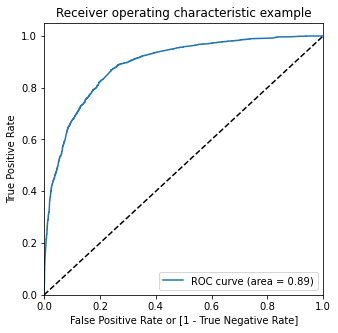

In [80]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### The area under ROC curve is 0.89 which is a very good value.

In [81]:
# Optimal cutoff probability is that prob where we get balanced sensitivity and specificity
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.308414,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.272407,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.382601,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.853966,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.154260,3934,0,1,1,0,0,0,0,0,0,0,0


In [82]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.624459  0.969992  0.411544
0.2   0.2  0.764688  0.911598  0.674163
0.3   0.3  0.801330  0.868208  0.760120
0.4   0.4  0.811998  0.765207  0.840830
0.5   0.5  0.814162  0.695053  0.887556
0.6   0.6  0.809678  0.633820  0.918041
0.7   0.7  0.786024  0.527981  0.945027
0.8   0.8  0.765615  0.437145  0.968016
0.9   0.9  0.712894  0.264801  0.989005


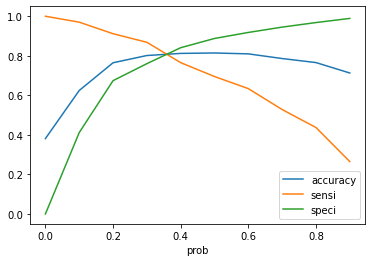

In [83]:
# plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [84]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.308414,1871,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.272407,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.382601,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.853966,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.154260,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [85]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8013296227581942

In [86]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3042,  960],
       [ 325, 2141]], dtype=int64)

In [87]:
# Calculating the sensitivity
TP/(TP+FN)

0.6950527169505272

### Predictions on the test set 

In [88]:
#scaling test set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[col] = scaler.fit_transform(X_test[col])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
4269,0.148148,0.448735,8.0,0,0.0,0,0,0,0,1,...,0,0.0,0.0,0.0,0,0,1,0.0,0,0
2376,0.000000,0.000000,0.0,0,1.0,0,0,0,0,0,...,0,0.0,0.0,0.0,0,0,1,0.0,0,0
7766,0.092593,0.026187,5.0,0,0.0,0,0,0,0,0,...,0,0.0,0.0,0.0,0,0,0,1.0,0,0
9199,0.000000,0.000000,0.0,0,0.0,0,0,0,0,0,...,0,0.0,1.0,0.0,0,0,0,0.0,0,0
4359,0.000000,0.000000,0.0,0,1.0,0,0,0,0,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0,0


In [89]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Do Not Email_yes,Last Activity_sms sent,Country_not provided,What is your current occupation_working professional,What matters most to you in choosing a course_not provided,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_unreachable
4269,0.148148,0.448735,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2376,0.000000,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7766,0.092593,0.026187,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9199,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4359,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
X_test_sm = sm.add_constant(X_test)

In [91]:
X_test_sm.shape

(2772, 13)

In [92]:
y_test_pred = res.predict(X_test_sm)  

In [93]:
y_test_pred[:10]

4269    0.731956
2376    0.956505
7766    0.949883
9199    0.154260
4359    0.864988
9186    0.744070
1631    0.631341
8963    0.233863
8007    0.046825
5324    0.457095
dtype: float64

In [94]:
# Converting y_pred to a dataframe which is an array
y_pred_d = pd.DataFrame(y_test_pred)

In [95]:
# Let's see the head
y_pred_d.head()

,0
4269,0.731956
2376,0.956505
7766,0.949883
9199,0.154260
4359,0.864988


In [96]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [97]:
y_test_df['Prospect ID'] = y_test_df.index

In [98]:
# Removing index for both dataframes to append them side by side 
y_pred_d.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [99]:
y_pred_final = pd.concat([y_test_df, y_pred_d],axis=1)

In [100]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.731956
1,1,2376,0.956505
2,1,7766,0.949883
3,0,9199,0.154260
4,1,4359,0.864988


In [101]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [102]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4269,0.731956
1,1,2376,0.956505
2,1,7766,0.949883
3,0,9199,0.154260
4,1,4359,0.864988


In [103]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [104]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.731956,73
1,2376,1,0.956505,96
2,7766,1,0.949883,95
3,9199,0,0.154260,15
4,4359,1,0.864988,86


In [105]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [106]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.731956,73,1
1,2376,1,0.956505,96,1
2,7766,1,0.949883,95,1
3,9199,0,0.154260,15,0
4,4359,1,0.864988,86,1


In [107]:
checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    999
0     96
Name: final_Predicted, dtype: int64

In [108]:
# check the precentage of final_predicted conversions on test data
865/float(865+177)

0.8301343570057581

### Metrics Calculation 

In [109]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7914862914862915

In [110]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion_test

array([[1195,  482],
       [  96,  999]], dtype=int64)

In [111]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [112]:
# sensitivity
TP / float(TP+FN)

0.9123287671232877

In [113]:
#specificity
TN / float(TN+FP)

0.7125819916517591

In [114]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.6745442268737339

In [115]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.9123287671232877

With the current cut off as 0.41 we have Precision around 67% and Recall around 91%

### conclusion

1. Accuracy, Sensitivity and Specificity values of test set are around 79%, 91% and 71% which are approximately closer to the respective values calculated using trained set.
2. we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
3. Hence overall this model seems to be good.

#### Observation

1. It was found that the variables that mattered the most in the potential buyers
            a. The total time spend on the Website.
            b. Total number of visits.
2. Current occupation is as a working professional, Direct traffic, Google, Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.